# Exploratory Data Analysis on Cardiotocographic Dataset
This notebook solves all tasks given in **EDA1.docx**.

## 1. Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"/mnt/data/Cardiotocographic (1).csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


## 2. Data Cleaning and Preparation

In [2]:
# Missing values check
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [3]:
# Handle missing values: fill numeric with median
for col in df.select_dtypes(include=['float','int']).columns:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

### Fix Data Types if Needed

In [4]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

### Outlier Detection

In [5]:
# Using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

LB           10
AC           43
FM          347
UC           13
DL          125
DS          120
DP          284
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64

## 3. Statistical Summary

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.340204,11.214379,51.842487,126.000000,133.000000,140.000000,214.000000
AC,2126.0,0.003204,0.004373,-0.019284,0.000000,0.001634,0.005606,0.038567
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769
DS,2126.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,2126.0,0.000173,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000


## 4. Data Visualization ### Histograms

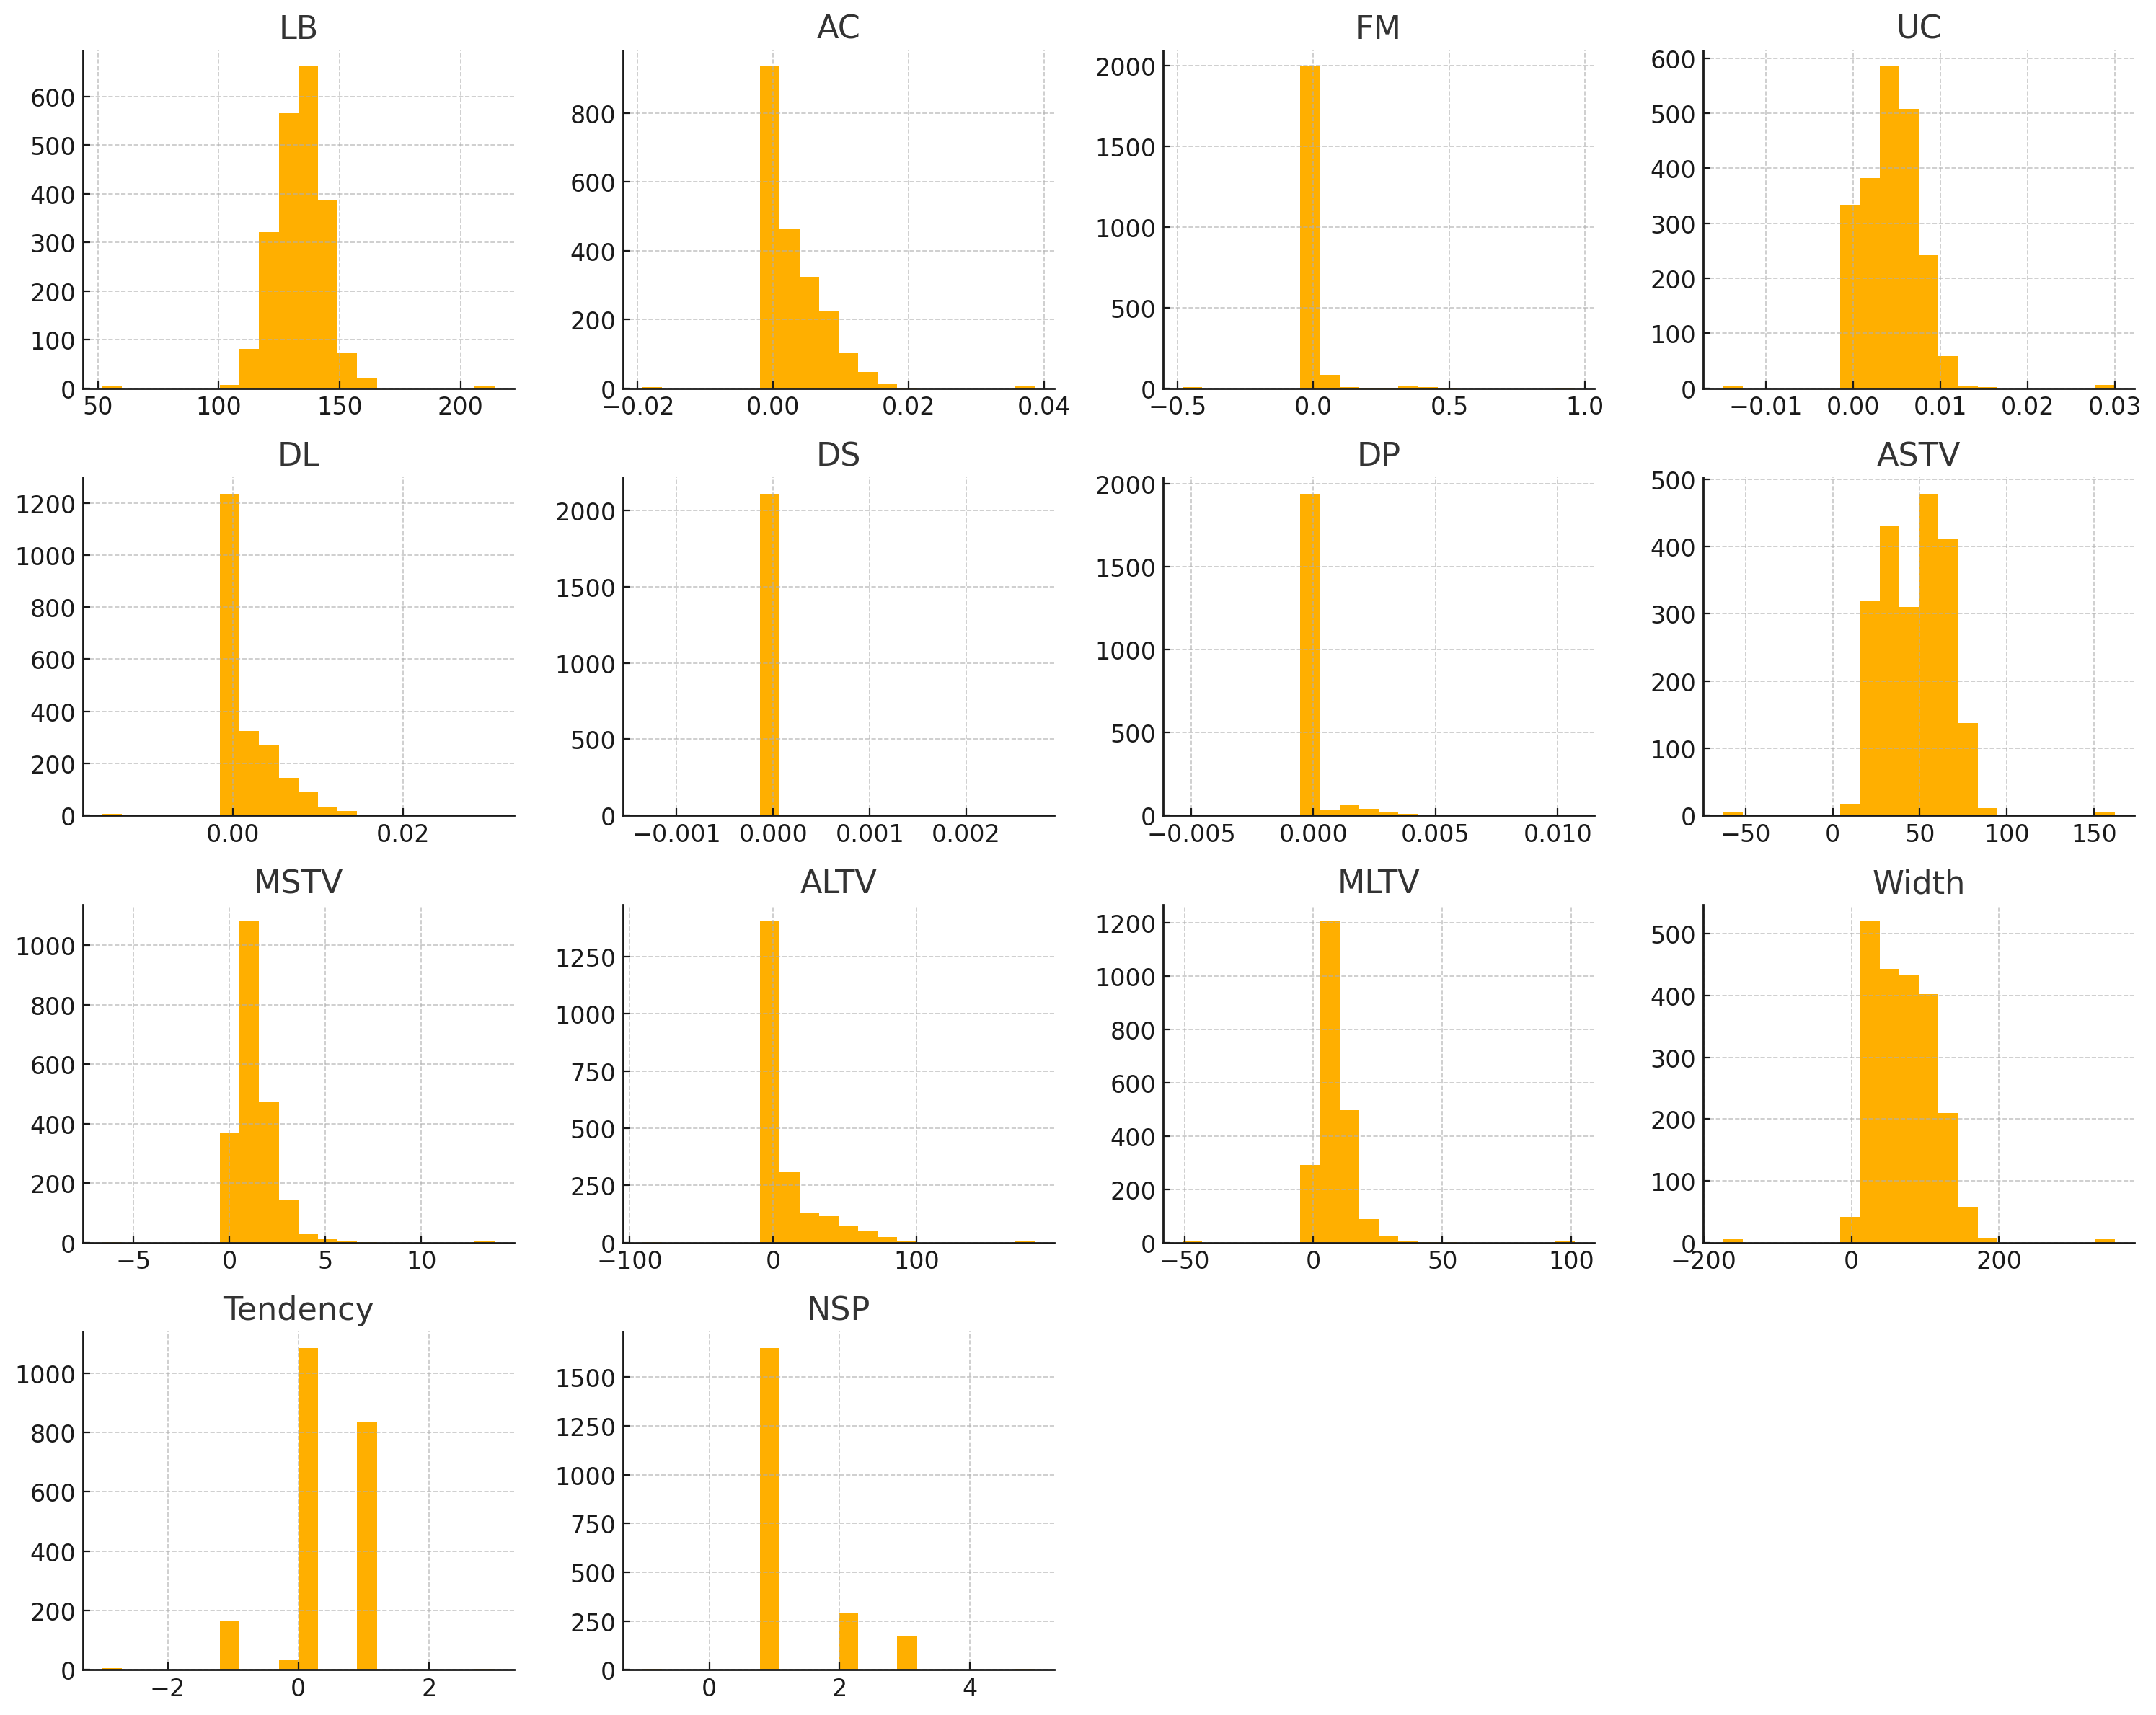

In [7]:
df.hist(figsize=(15,12), bins=20)
plt.tight_layout()
plt.show()

### Boxplots

/home/sandbox/.local/lib/python3.11/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


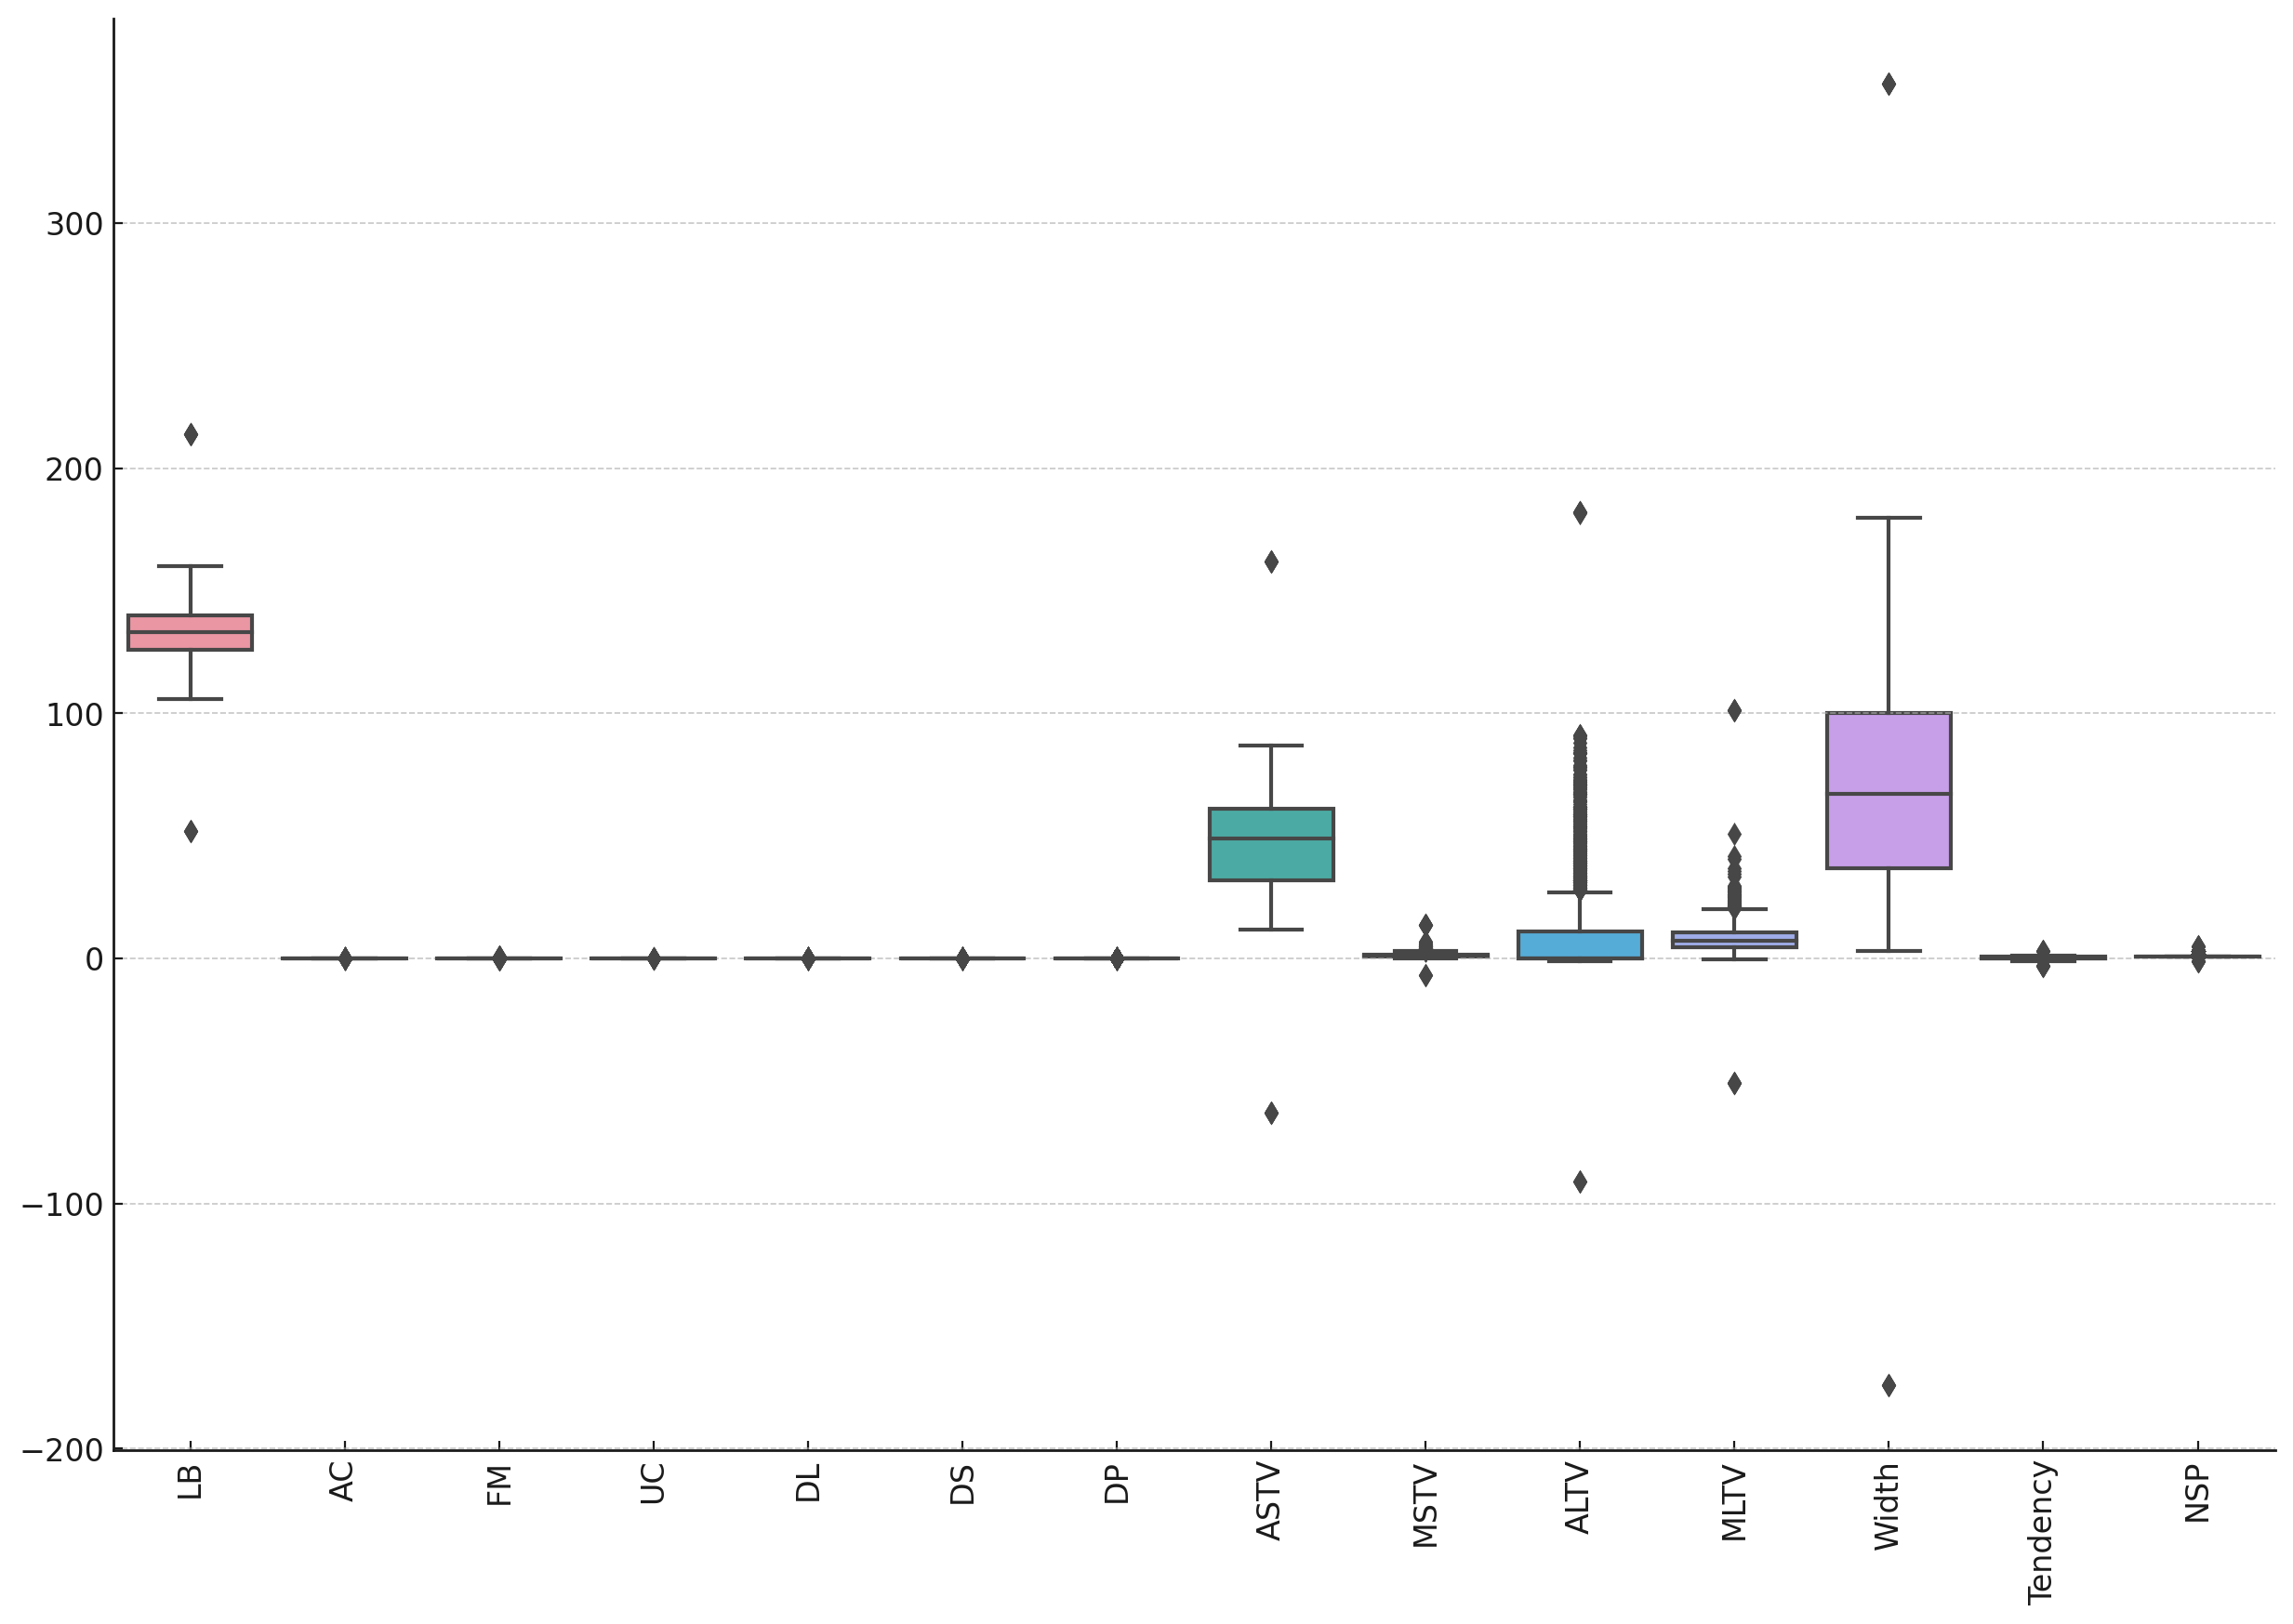

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

### Correlation Heatmap

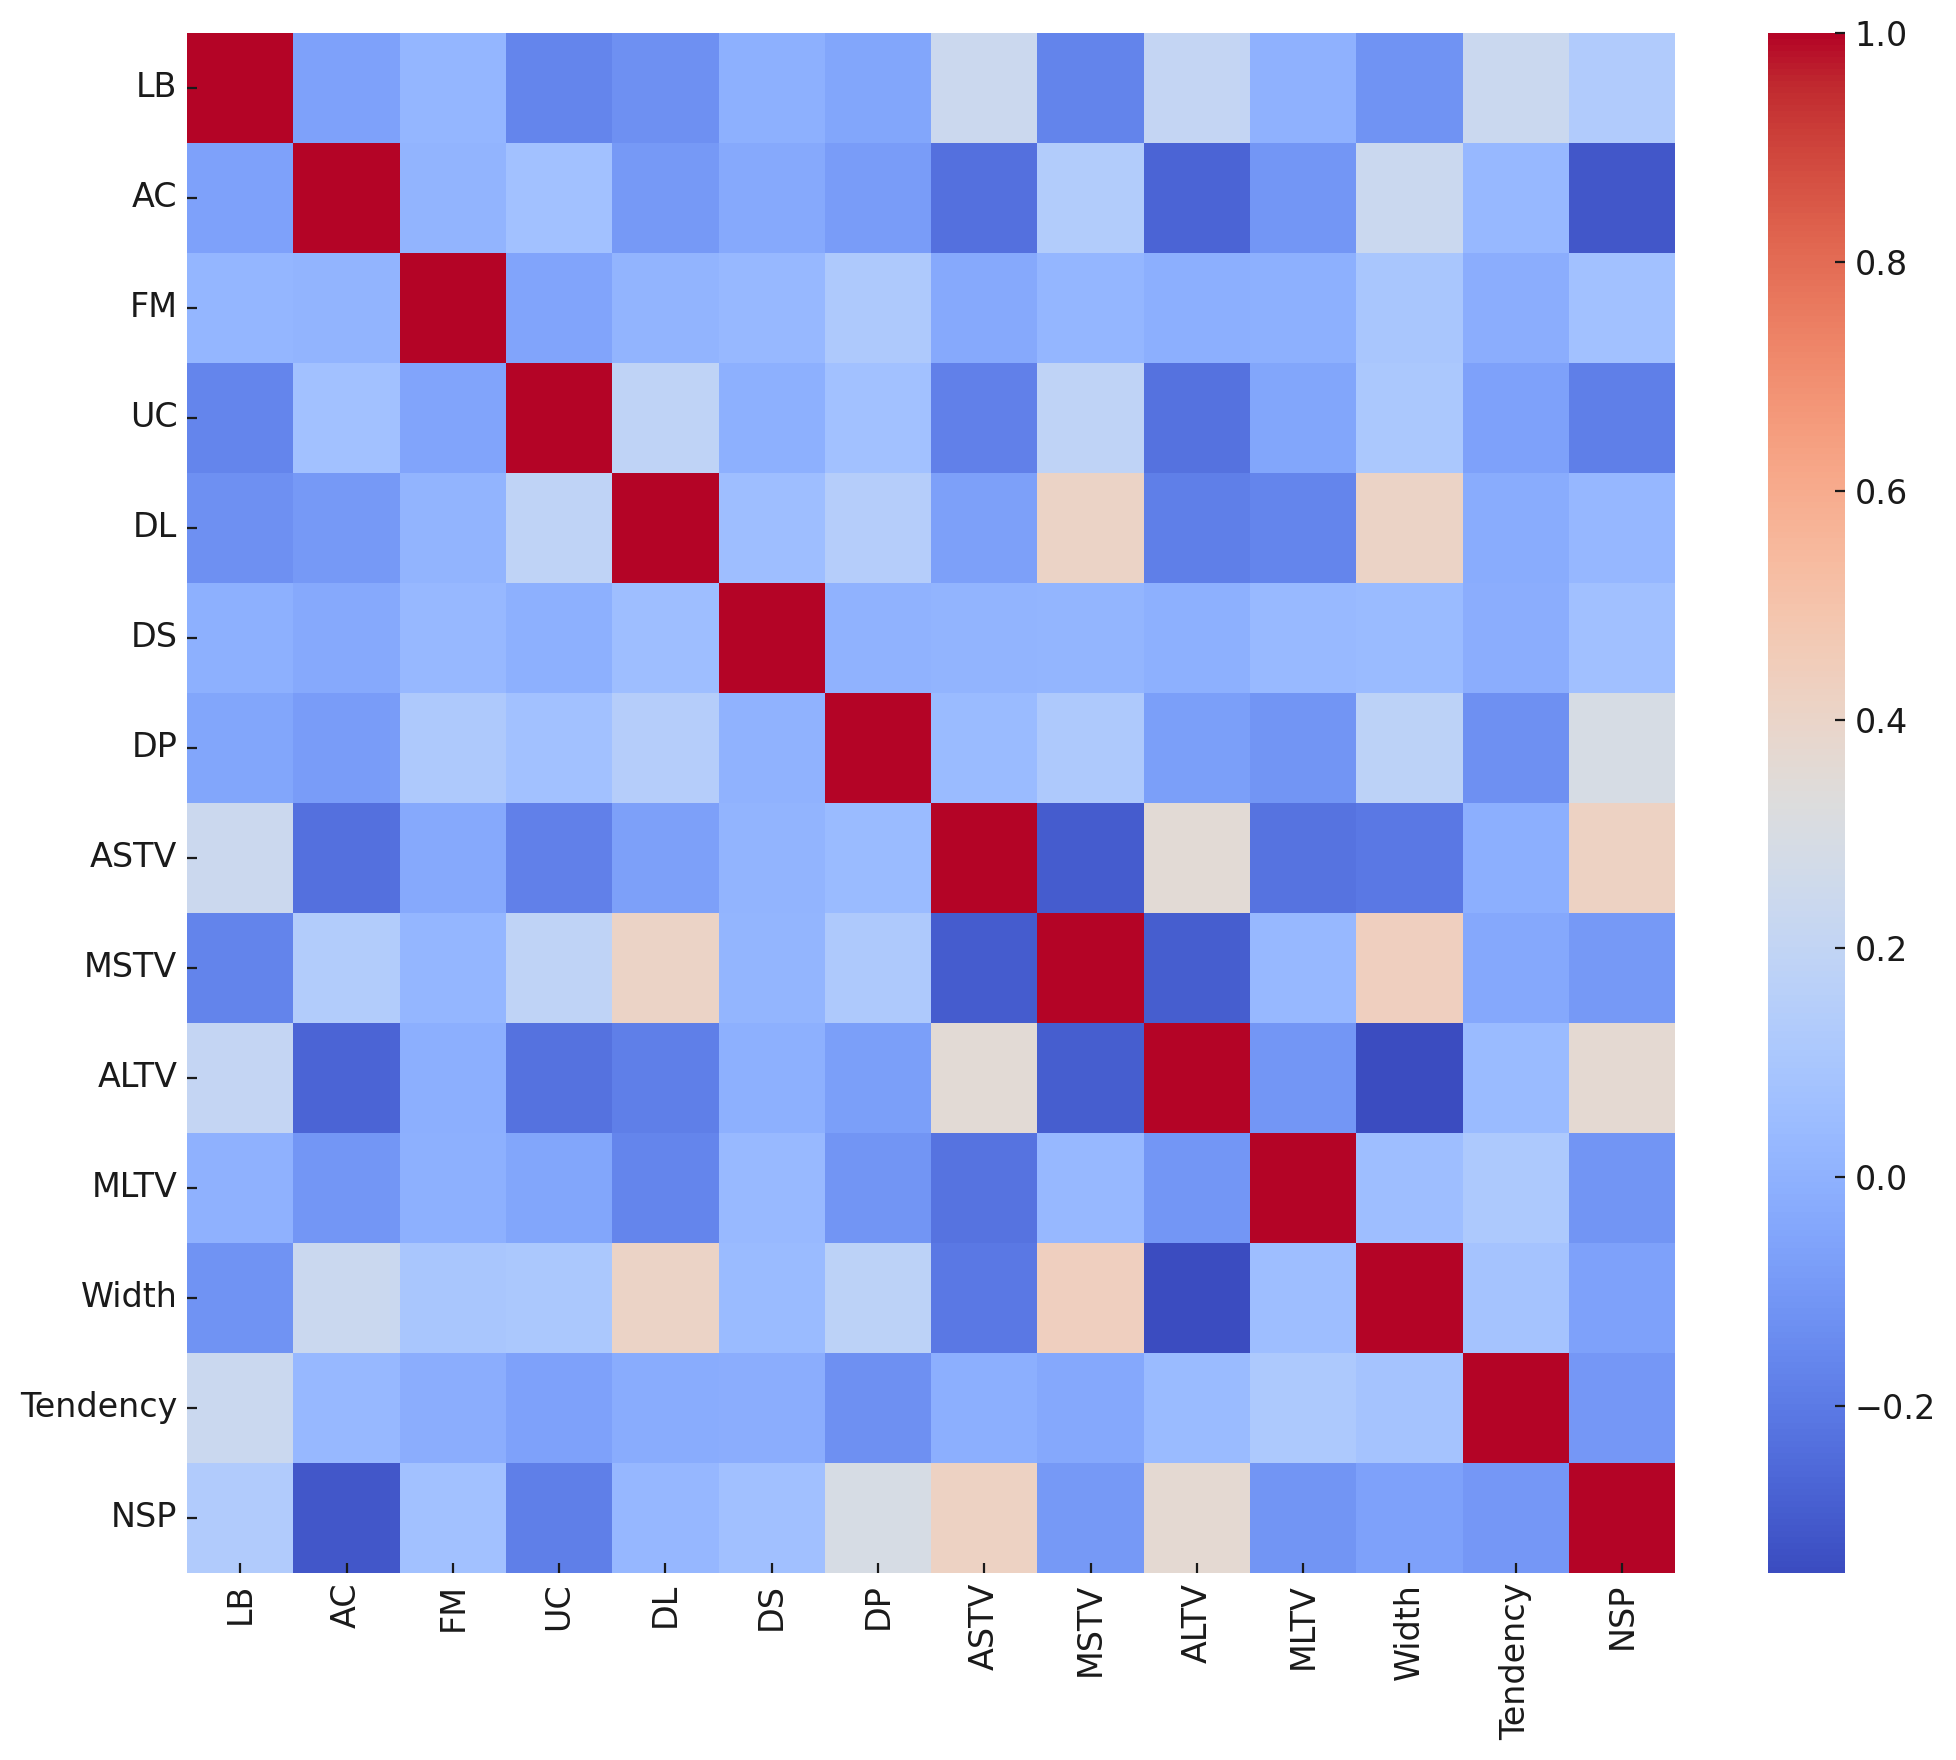

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.show()

### Pairplot

/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You 

/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You 

/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You 

/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You 

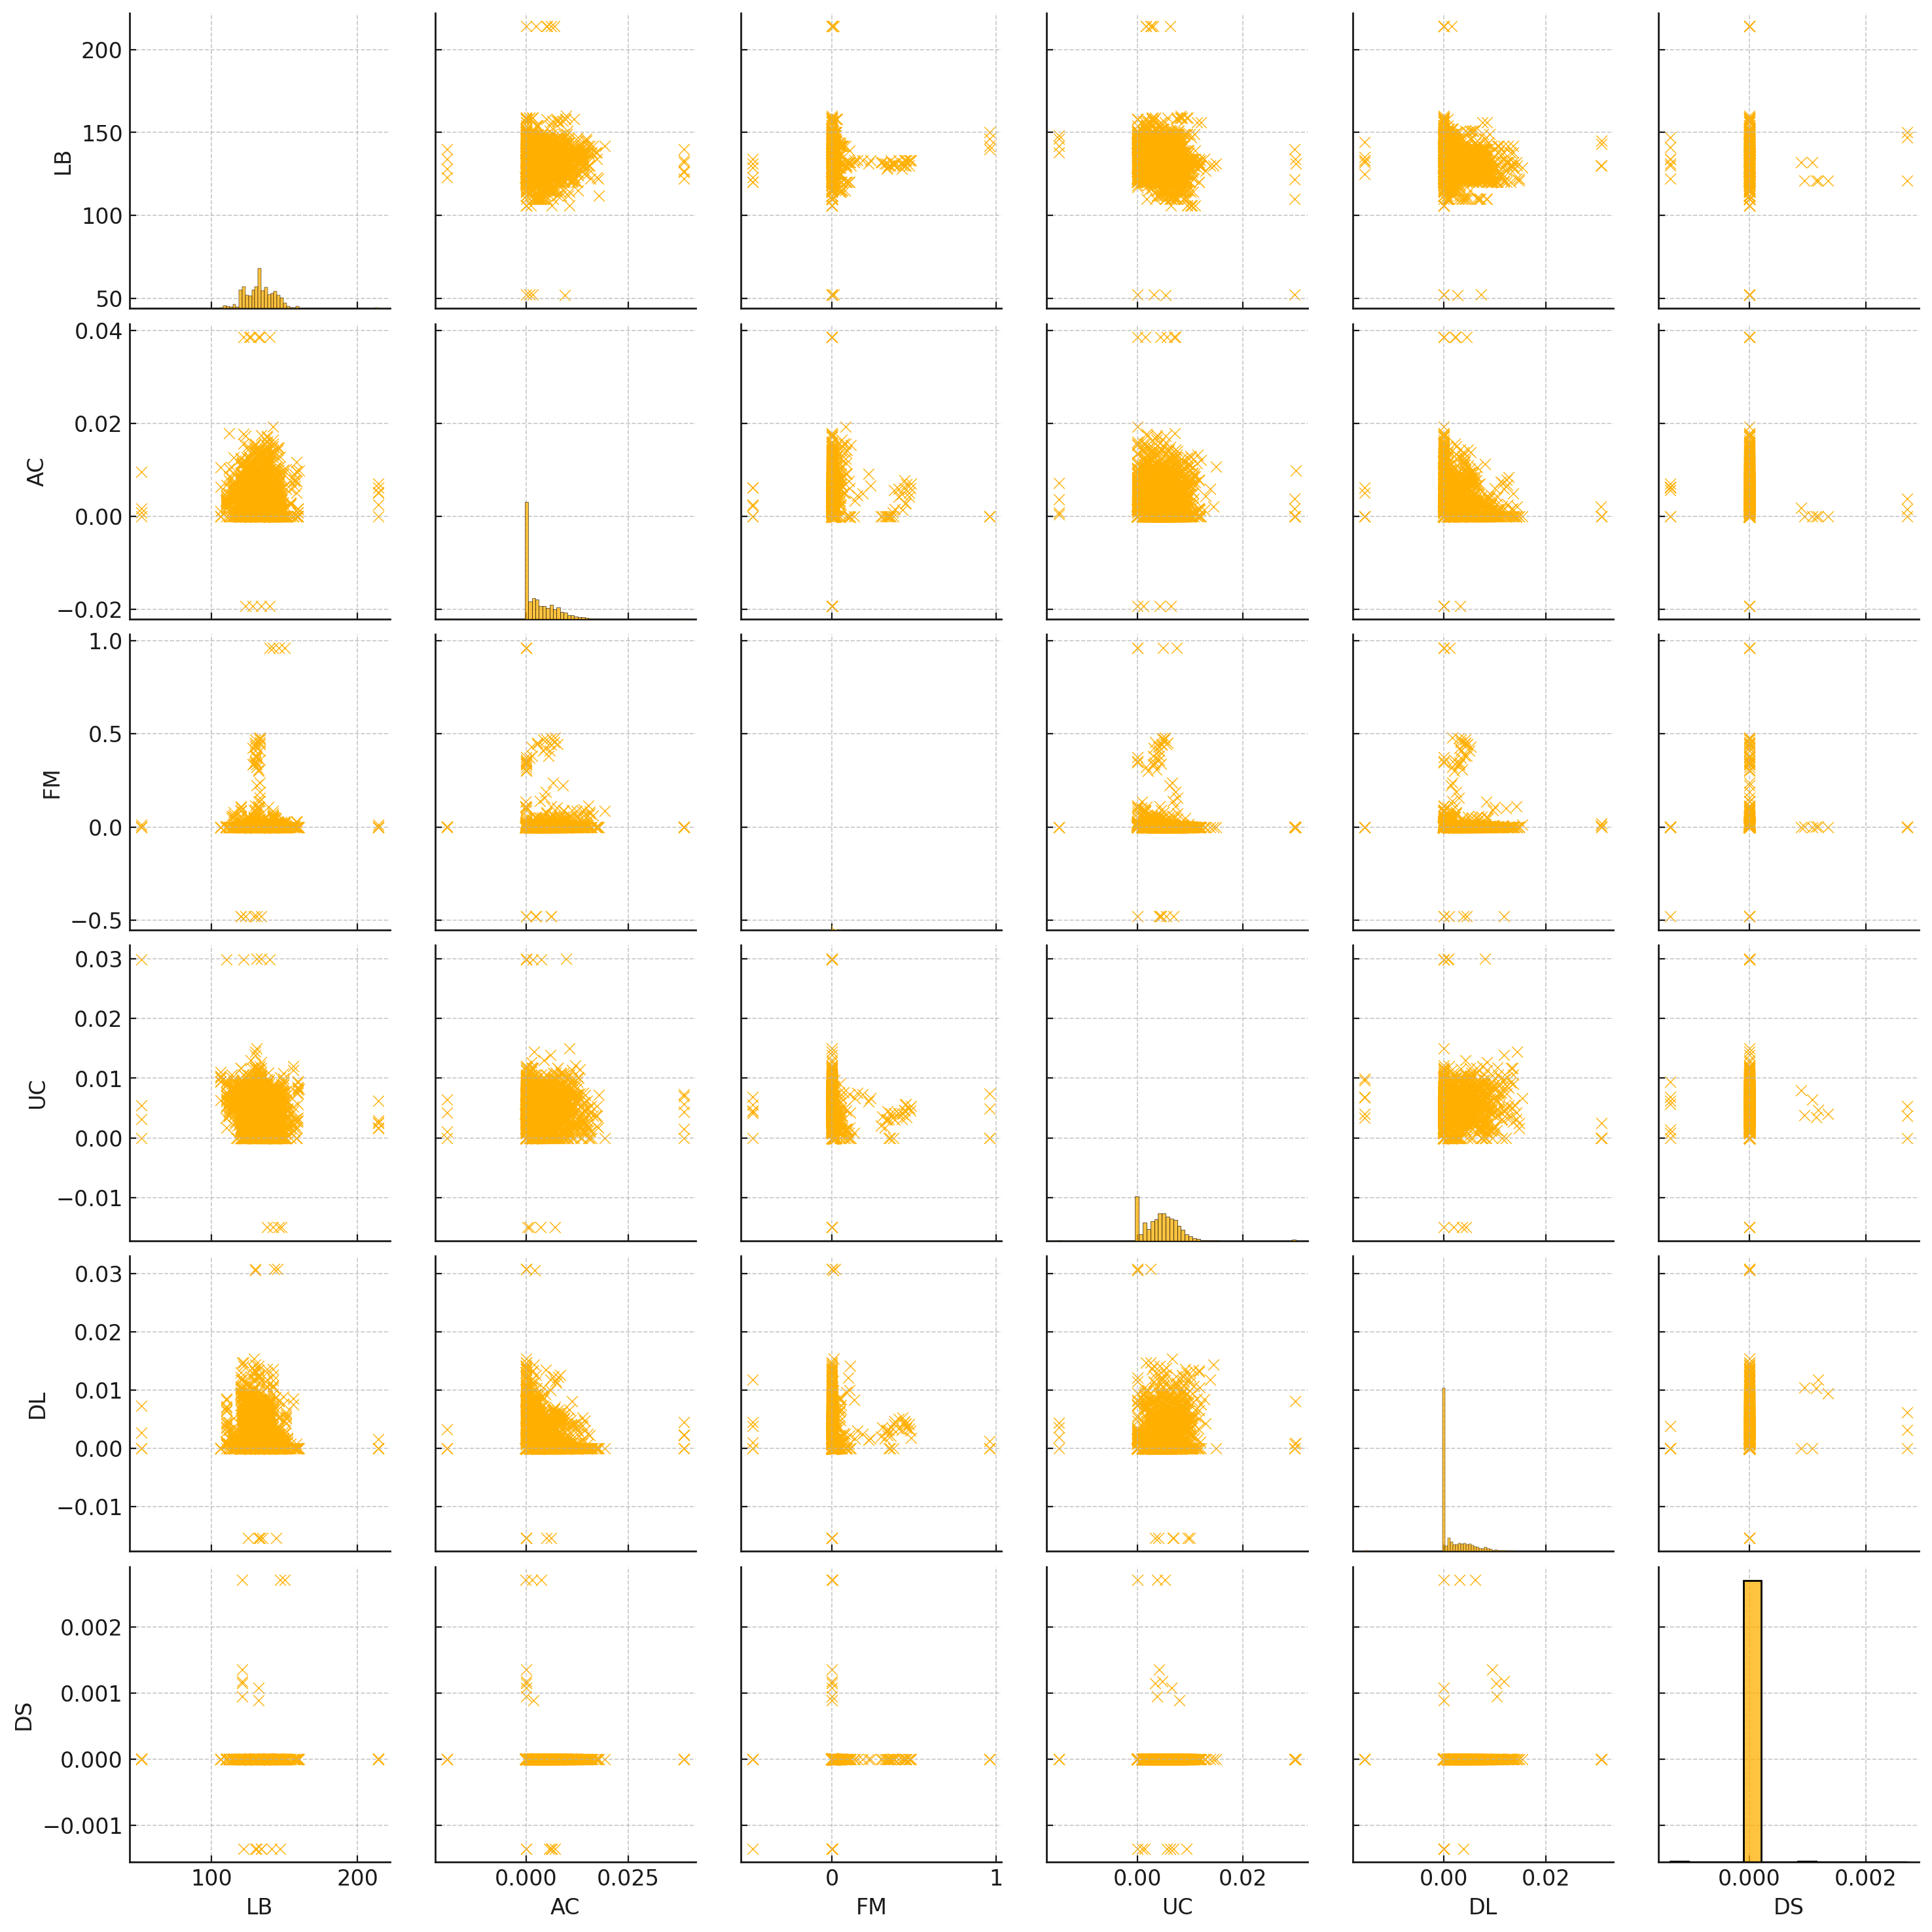

In [10]:
sns.pairplot(df.iloc[:, :6])   # first 6 columns only to avoid heavy plot
plt.show()

### Violin Plots

/home/sandbox/.local/lib/python3.11/site-packages/seaborn/categorical.py:967: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(center, q50,
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/categorical.py:967: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(center, q50,
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/categorical.py:967: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(center, q50,


/home/sandbox/.local/lib/python3.11/site-packages/seaborn/categorical.py:967: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(center, q50,
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/categorical.py:967: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(center, q50,
/home/sandbox/.local/lib/python3.11/site-packages/seaborn/categorical.py:967: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(center, q50,


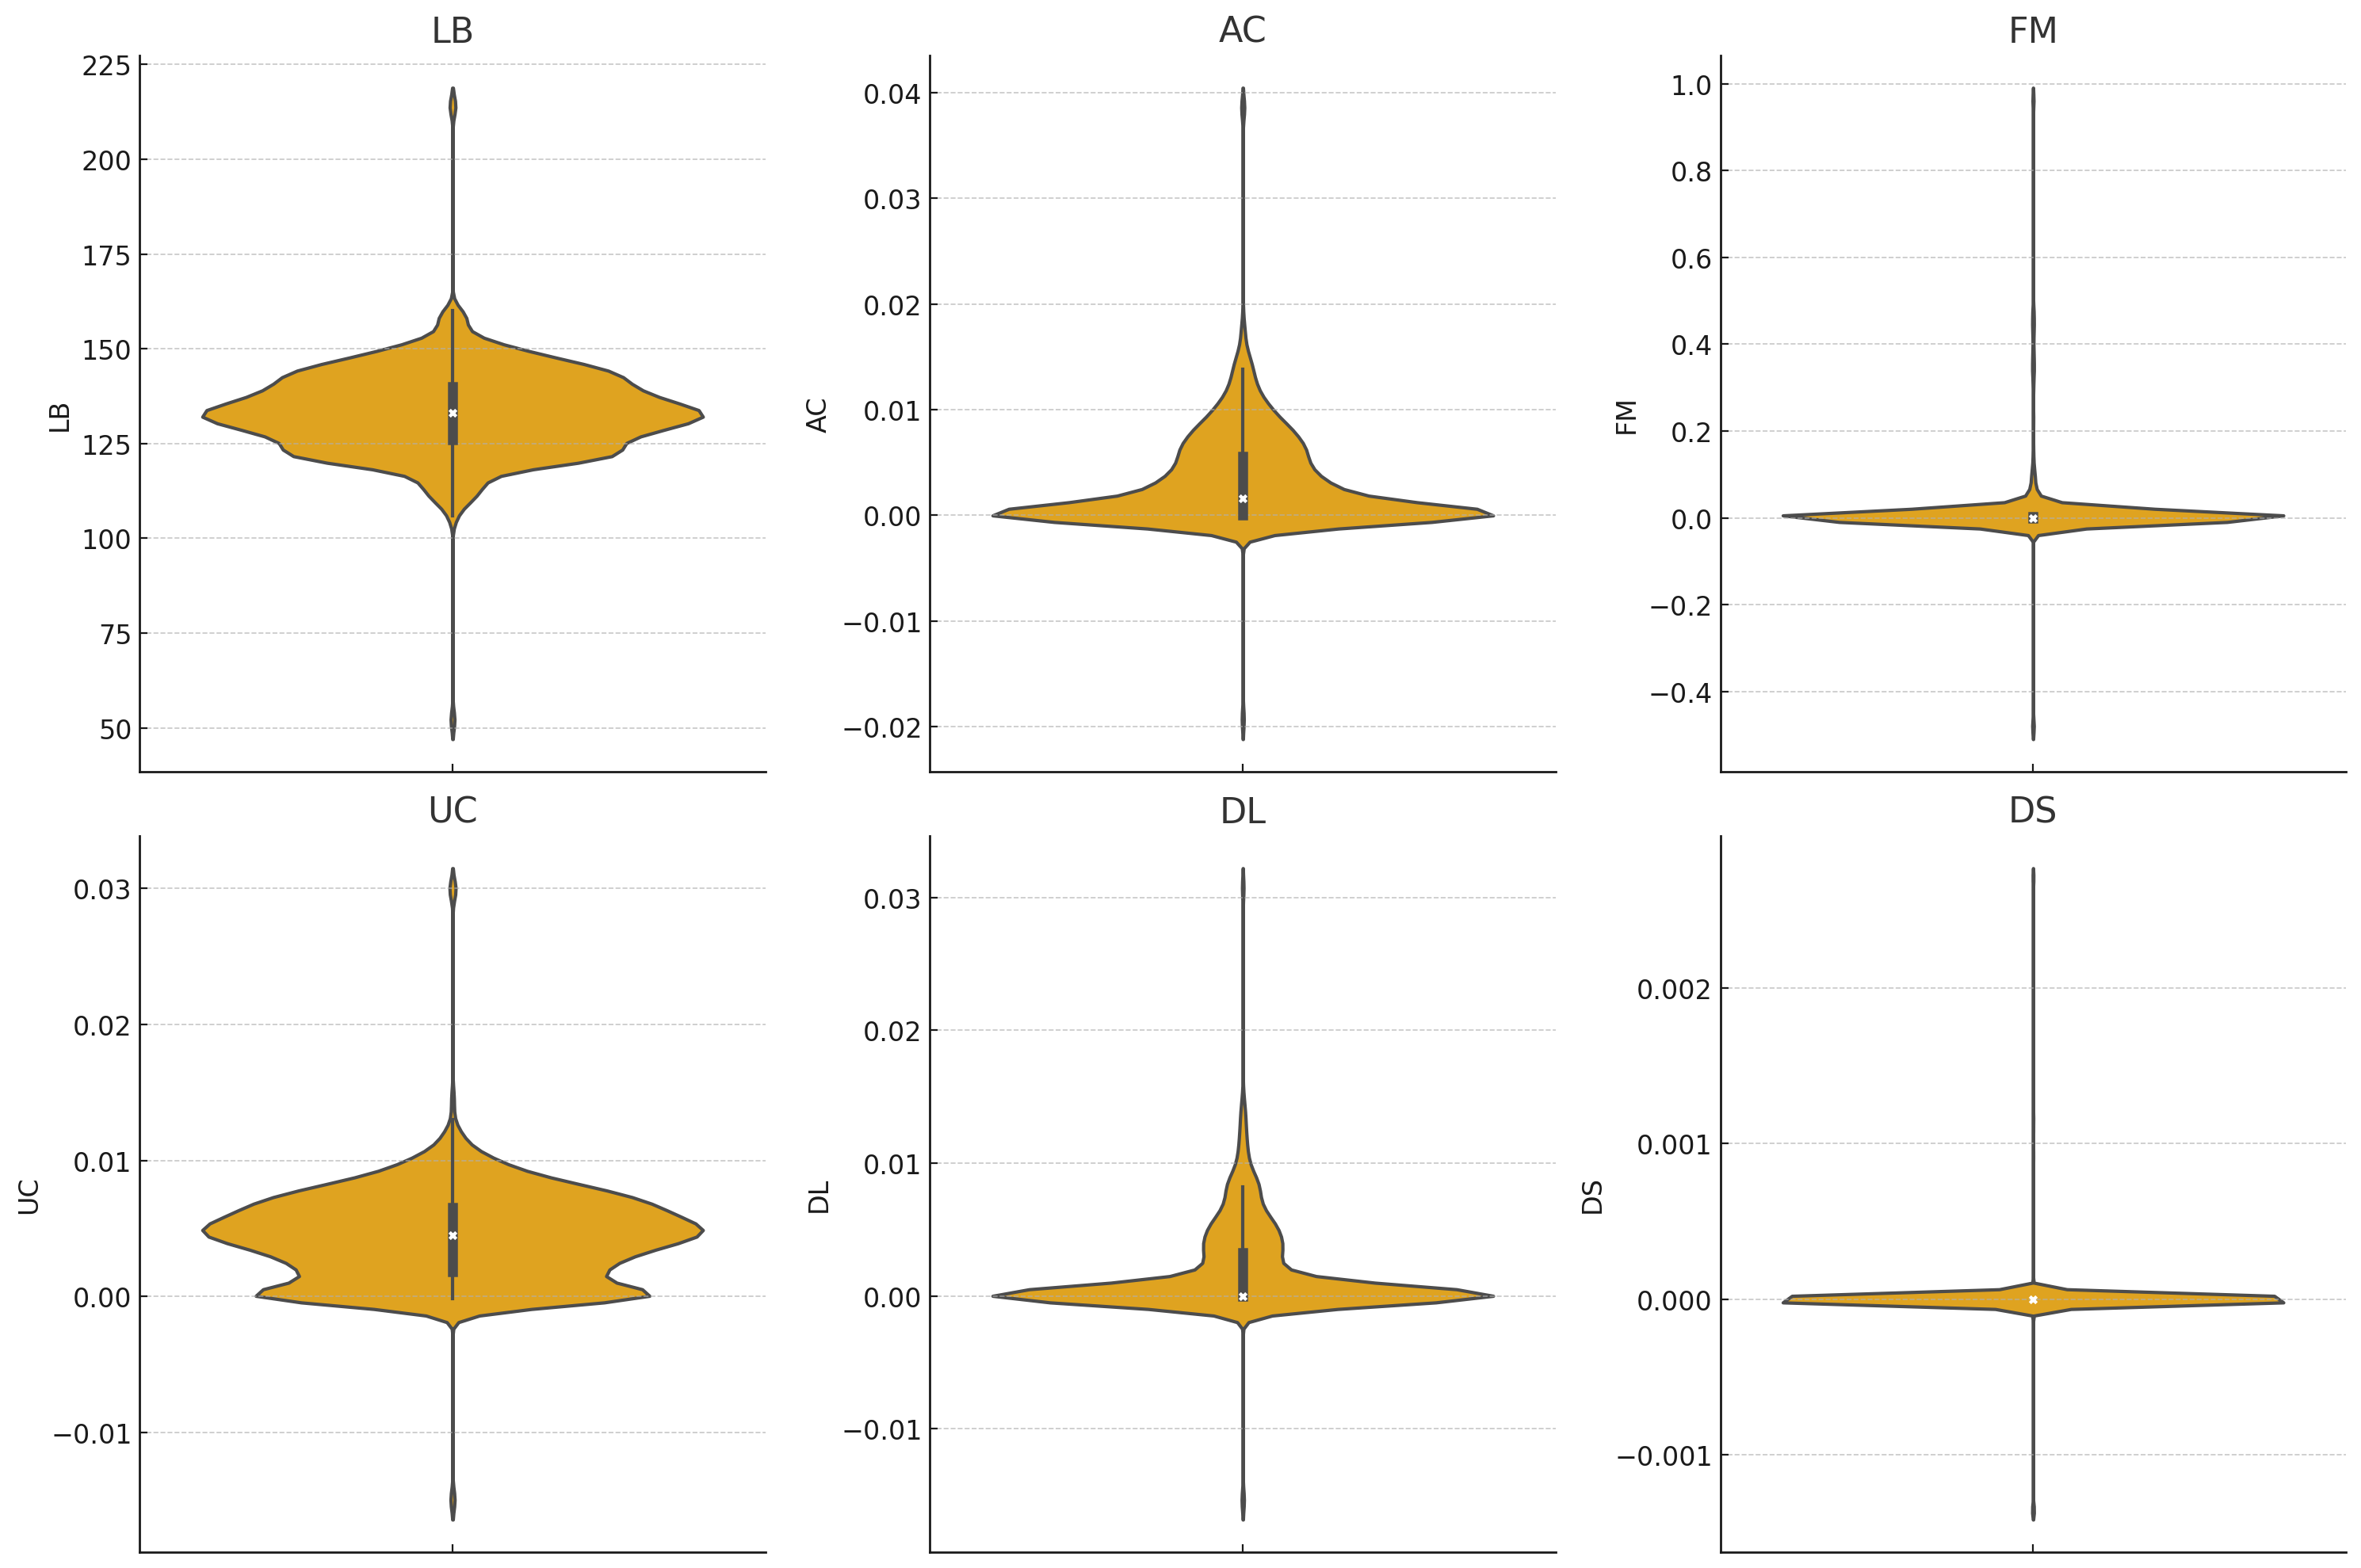

In [11]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:6]):  # first 6 cols
    plt.subplot(2,3,i+1)
    sns.violinplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## 5. Pattern Recognition and Insights
- Check correlations.
- Identify strongest relationships.
- Discuss patterns found.

In [12]:
df.corr().abs().unstack().sort_values(ascending=False).head(20)

LB        LB          1.000000
AC        AC          1.000000
Tendency  Tendency    1.000000
Width     Width       1.000000
MLTV      MLTV        1.000000
ALTV      ALTV        1.000000
MSTV      MSTV        1.000000
ASTV      ASTV        1.000000
DP        DP          1.000000
DS        DS          1.000000
DL        DL          1.000000
UC        UC          1.000000
FM        FM          1.000000
NSP       NSP         1.000000
Width     MSTV        0.432822
MSTV      Width       0.432822
NSP       ASTV        0.420873
ASTV      NSP         0.420873
MSTV      DL          0.410102
DL        MSTV        0.410102
dtype: float64

## 6. Conclusion
Summary of EDA findings explaining distributions, correlations, and important observations.